# EDA

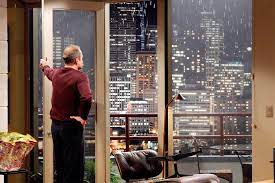

In [200]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Charles Christensen
### Invest with big returns, wondering about renovation?, which Neighborhood? Timing?


In [ ]:
# data loading

In [201]:
df = pd.read_csv('data/King_County_House_prices_dataset.csv')

In [203]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.000,3,1.000,1180,5650,1.000,NaN,0.000,...,7,1180,0.0,1955,0.000,98178,47.511,-122.257,1340,5650
1,6414100192,12/9/2014,538000.000,3,2.250,2570,7242,2.000,0.000,0.000,...,7,2170,400.0,1951,1991.000,98125,47.721,-122.319,1690,7639
2,5631500400,2/25/2015,180000.000,2,1.000,770,10000,1.000,0.000,0.000,...,6,770,0.0,1933,NaN,98028,47.738,-122.233,2720,8062
3,2487200875,12/9/2014,604000.000,4,3.000,1960,5000,1.000,0.000,0.000,...,7,1050,910.0,1965,0.000,98136,47.521,-122.393,1360,5000
4,1954400510,2/18/2015,510000.000,3,2.000,1680,8080,1.000,0.000,0.000,...,8,1680,0.0,1987,0.000,98074,47.617,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.000,3,2.500,1530,1131,3.000,0.000,0.000,...,8,1530,0.0,2009,0.000,98103,47.699,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.000,4,2.500,2310,5813,2.000,0.000,0.000,...,8,2310,0.0,2014,0.000,98146,47.511,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.000,2,0.750,1020,1350,2.000,0.000,0.000,...,7,1020,0.0,2009,0.000,98144,47.594,-122.299,1020,2007
21595,291310100,1/16/2015,400000.000,3,2.500,1600,2388,2.000,NaN,0.000,...,8,1600,0.0,2004,0.000,98027,47.535,-122.069,1410,1287


## Exploratory Data Analysis

# create new columns 
df['price_per_sqft'] = ((df['price'])/(df['sqft_living']))

In [205]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              21597 non-null  int64  
 1   date            21597 non-null  object 
 2   price           21597 non-null  float64
 3   bedrooms        21597 non-null  int64  
 4   bathrooms       21597 non-null  float64
 5   sqft_living     21597 non-null  int64  
 6   sqft_lot        21597 non-null  int64  
 7   floors          21597 non-null  float64
 8   waterfront      19221 non-null  float64
 9   view            21534 non-null  float64
 10  condition       21597 non-null  int64  
 11  grade           21597 non-null  int64  
 12  sqft_above      21597 non-null  int64  
 13  sqft_basement   21597 non-null  object 
 14  yr_built        21597 non-null  int64  
 15  yr_renovated    17755 non-null  float64
 16  zipcode         21597 non-null  int64  
 17  lat             21597 non-null 

In [206]:
#some houses seem to appear multiple times in the df
df.id.nunique()

21420

In [207]:
df.id.duplicated().value_counts()


False    21420
True       177
Name: id, dtype: int64

In [208]:
#Some missing values in waterfront, view, and yr_renovated
#waterfront is especially interesting since we work for a stakeholder with  focus
#on the waterfront aspect
df.isnull().sum()

id                   0
date                 0
price                0
bedrooms             0
bathrooms            0
sqft_living          0
sqft_lot             0
floors               0
waterfront        2376
view                63
condition            0
grade                0
sqft_above           0
sqft_basement        0
yr_built             0
yr_renovated      3842
zipcode              0
lat                  0
long                 0
sqft_living15        0
sqft_lot15           0
price_per_sqft       0
dtype: int64

In [209]:
#Upnext how do categories are labeled
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'price_per_sqft'],
      dtype='object')

In [210]:
# checking for uniques values
df.bedrooms.unique()

array([ 3,  2,  4,  5,  1,  6,  7,  8,  9, 11, 10, 33])

In [211]:
# checking for uniques values
df.bathrooms.unique()

array([1.  , 2.25, 3.  , 2.  , 4.5 , 1.5 , 2.5 , 1.75, 2.75, 3.25, 4.  ,
       3.5 , 0.75, 4.75, 5.  , 4.25, 3.75, 1.25, 5.25, 6.  , 0.5 , 5.5 ,
       6.75, 5.75, 8.  , 7.5 , 7.75, 6.25, 6.5 ])

In [212]:
# checking for uniques values
df.floors.unique()

array([1. , 2. , 1.5, 3. , 2.5, 3.5])

In [213]:
# checking for uniques values
df.waterfront.unique()

array([nan,  0.,  1.])

In [214]:
# checking for uniques values
df.view.unique()

array([ 0., nan,  3.,  4.,  2.,  1.])

In [215]:
# checking for uniques values
df.condition.unique()

array([3, 5, 4, 1, 2])

In [216]:
# checking for uniques values
df.grade.unique()

array([ 7,  6,  8, 11,  9,  5, 10, 12,  4,  3, 13])

<AxesSubplot:>

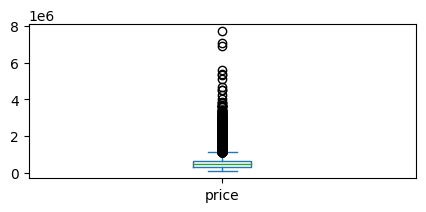

In [217]:
# box plot for real estate prices
plt.figure(figsize = (5,2))
df.price.plot(kind = 'box')

In [218]:
#93 percent of the houses/apartments are below 1 mio dollar
(df.price.where(df['price'] < 1e6).count()/df.id.count()).round(2)

0.93

In [220]:
# creating new columns for day, month and year
df['month'] = pd.to_datetime(df['date'], format='%m/%d/%Y').dt.month
df['day'] = pd.to_datetime(df['date'], format='%m/%d/%Y').dt.day
df['year'] = pd.to_datetime(df['date'], format='%m/%d/%Y').dt.year

In [339]:
# heat map for different prices in Seattle
fig = px.scatter_mapbox(df, lat="lat", lon="long", zoom=8, height=500, color= 'price_per_sqft')
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0}, 
        title = {'text': 'Real Estate Prices', 'y':0.9,
        'x':0.1,
        'xanchor': 'center',
        'yanchor': 'top',
        })

In [338]:
# Location of real estates above 2 mio.
fig = px.scatter_mapbox(df.query('price > 2e6'), lat="lat", lon="long", zoom=10, height=300)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0}, title = {'text': 'Real Estate Price above 2 mio', 'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

# Neighbourhood

Text(0, 0.5, 'Mean Price for Real Estate in $')

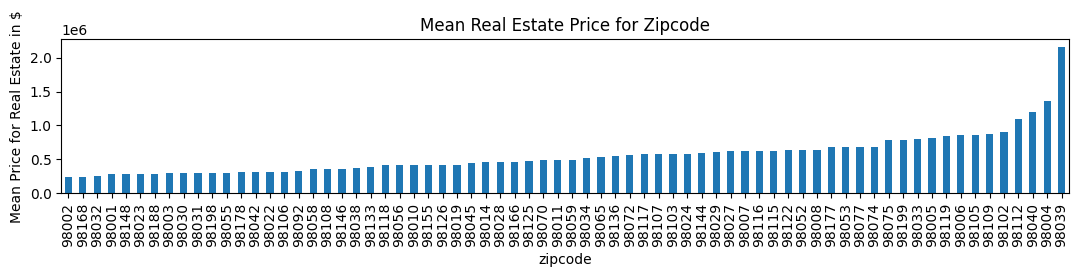

In [223]:
# Mean Real Estate Price for Zipcode
plt.figure(figsize = (13,2))
df.groupby(['zipcode'])['price'].mean().sort_values().plot(kind = 'bar')
plt.title('Mean Real Estate Price for Zipcode')
plt.ylabel('Mean Price for Real Estate in $')


In [342]:
# filtering the df for following zipcodes 98039, 98004, 98112, 98109, 98119
df[df[['zipcode', 'lat', 'long', 'price']]['zipcode'].isin([98039, 98004, 98112, 98109, 98119])]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_per_sqft,month,day,year
66,3394100030,9/9/2014,975000.000,4,2.500,2720,11049,2.000,NaN,0.000,...,0.000,98004,47.581,-122.192,2750,11049,358.456,9,9,2014
69,1802000060,6/12/2014,1330000.000,5,2.250,3200,20158,1.000,0.000,0.000,...,0.000,98004,47.630,-122.215,3390,20158,415.625,6,12,2014
103,2450000295,10/7/2014,1090000.000,3,2.500,2920,8113,2.000,0.000,0.000,...,2010.000,98004,47.581,-122.196,2370,8113,373.288,10,7,2014
125,4389200955,3/2/2015,1450000.000,4,2.750,2750,17789,1.500,0.000,0.000,...,1992.000,98004,47.614,-122.212,3060,11275,527.273,3,2,2015
269,7960900060,5/4/2015,2900000.000,4,3.250,5050,20100,1.500,0.000,2.000,...,NaN,98004,47.631,-122.223,3890,20060,574.257,5,4,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21498,3262300818,2/27/2015,1870000.000,4,3.750,3790,8797,2.000,0.000,0.000,...,NaN,98039,47.635,-122.236,2660,12150,493.404,2,27,2015
21514,8964800330,4/7/2015,3000000.000,4,3.750,5090,14823,1.000,0.000,0.000,...,NaN,98004,47.620,-122.207,3030,12752,589.391,4,7,2015
21517,524059322,2/26/2015,999999.000,3,2.500,2100,4097,2.000,0.000,0.000,...,0.000,98004,47.598,-122.200,1780,4764,476.190,2,26,2015
21552,524059330,1/30/2015,1700000.000,4,3.500,3830,8963,2.000,0.000,0.000,...,0.000,98004,47.599,-122.197,2190,10777,443.864,1,30,2015


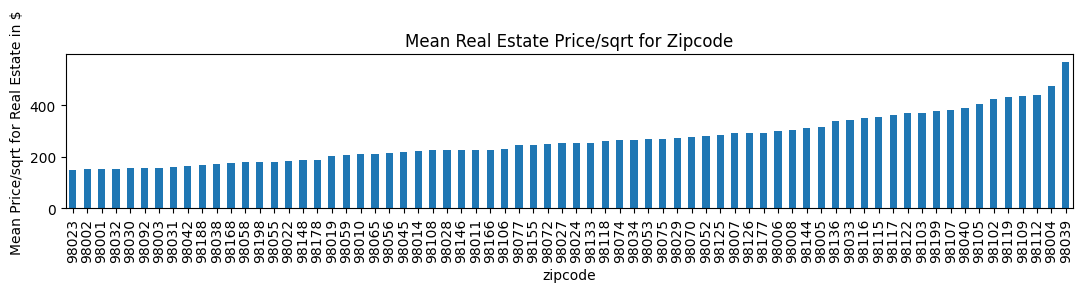

In [254]:
# Histogram of Mean Real Estate Price/square meter for Zipcode
plt.figure(figsize = (13,2))
df.groupby(['zipcode'])['price_per_sqft'].mean().sort_values().plot(kind = 'bar')
plt.title('Mean Real Estate Price/sqrt for Zipcode')
plt.ylabel('Mean Price/sqrt for Real Estate in $')
plt.savefig(fname= 'Mean Real estete Pricesqrt', dpi = 300, bbox_inches = 'tight')

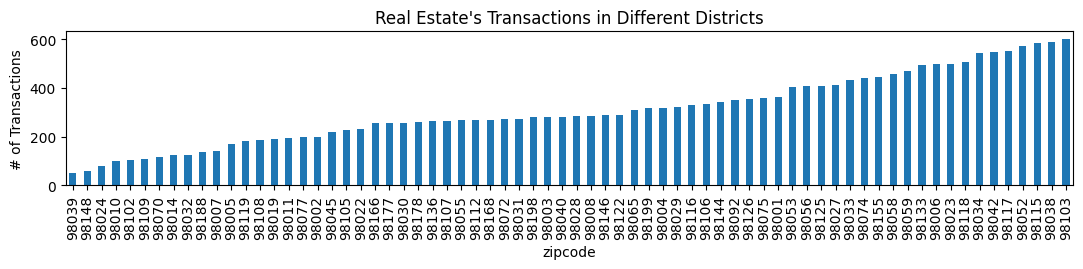

In [287]:
# Histogram of real Estate's Transactions in Different Districts
plt.figure(figsize = (13,2))
df.groupby(['zipcode'])['id'].count().sort_values().plot(kind = 'bar')
plt.title("Real Estate's Transactions in Different Districts")
plt.ylabel('# of Transactions')
plt.savefig(fname= "Real Estate's Transactions in Different Districts", dpi = 300, bbox_inches = 'tight')

In [345]:
# plotting the top 5% neighborhoods with the highest prices
fig = px.scatter_mapbox(df[df[['zipcode', 'lat', 'long', 'price']]['zipcode'].isin([98039, 98004, 98112, 98109, 98119])], lat="lat", lon="long", zoom=10, height=500, color='zipcode')
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0}, 
        title = {'text': 'Real Estate with the Highest Price per SquareFoot', 'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

In [230]:
# top prices zipcodes (15) 
df.groupby(['zipcode'])['price'].mean().sort_values().head(15).index

Int64Index([98002, 98168, 98032, 98001, 98148, 98023, 98188, 98003, 98030,
            98031, 98198, 98055, 98178, 98042, 98022],
           dtype='int64', name='zipcode')

Text(0, 0.5, 'The Mean $ Price for Real Estate')

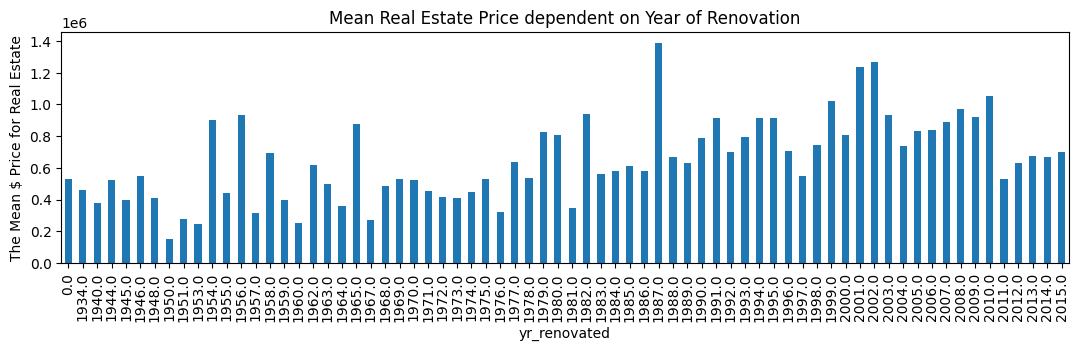

In [231]:
# Mean Real Estate Price dependent on Year of Renovation
plt.figure(figsize = (13,3))
df.groupby(['yr_renovated'])['price'].mean().plot(kind = 'bar')
plt.title('Mean Real Estate Price dependent on Year of Renovation')
plt.ylabel('The Mean $ Price for Real Estate')

Text(0, 0.5, '#')

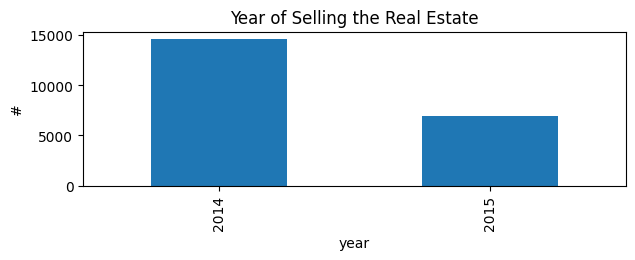

In [346]:
# How many real estates were sold in each year?
plt.figure(figsize=(7,2))
df.groupby(['year'])['price'].count().plot(kind = 'bar')
plt.title('Year of Selling the Real Estate')
plt.ylabel('#')

# Timing

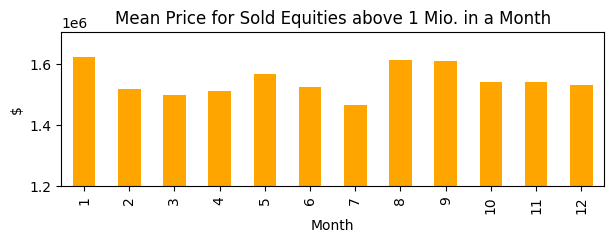

In [233]:
# Mean Price for Sold Equities above 1 Mio. in a Month
plt.figure(figsize=(7,2))
df[df['price'] > 1000000].groupby(['month'])['price'].mean().plot(kind = 'bar', color = 'orange')
plt.title('Mean Price for Sold Equities above 1 Mio. in a Month')
plt.ylim(1.2e6)
plt.xlabel('Month')
plt.ylabel('$')
plt.savefig(fname= 'price per day per sale 1 mio above', dpi = 300, bbox_inches = 'tight')

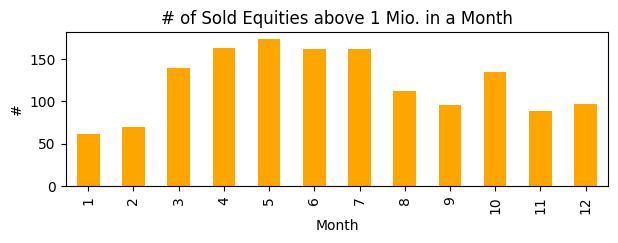

In [234]:
# Number of Sold Equities above 1 Mio. in a Month
plt.figure(figsize=(7,2))
df[df['price'] > 1000000].groupby(['month'])['id'].count().plot(kind = 'bar', color = 'orange')
plt.title('# of Sold Equities above 1 Mio. in a Month')
plt.xlabel('Month')
plt.ylabel('#')
plt.savefig(fname= 'number per day per sale 1 mio above', dpi = 300, bbox_inches = 'tight')

Text(0, 0.5, '# of Sells')

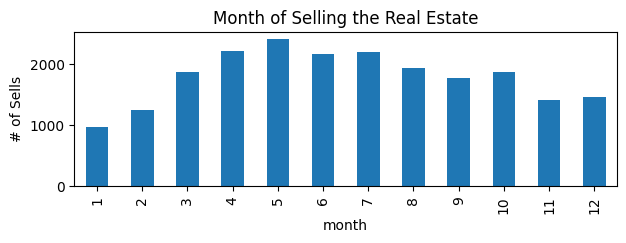

In [235]:
# Month of Selling the Real Estate
plt.figure(figsize=(7,2))
df.groupby(['month'])['id'].count().plot(kind = 'bar')
plt.title('Month of Selling the Real Estate')
plt.ylabel('# of Sells')

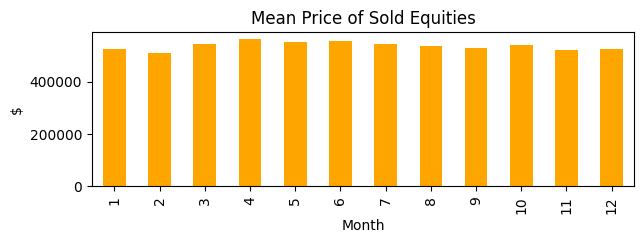

In [236]:
#Timing! These plots are used to draw conclusions for timing
plt.figure(figsize=(7,2))
df.groupby(['month'])['price'].mean().plot(kind = 'bar', color = 'orange')
plt.title('Mean Price of Sold Equities')
plt.ylabel('$')
plt.xlabel('Month')
plt.savefig(fname= 'Month of Sales', dpi = 300)

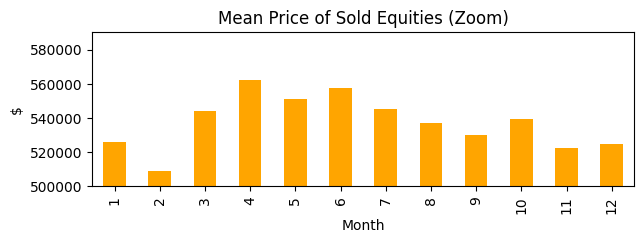

In [237]:
# Mean Price of Sold Equities. Also the figure is saved
plt.figure(figsize=(7,2))
df.groupby(['month'])['price'].mean().plot(kind = 'bar', color = 'orange')
plt.title('Mean Price of Sold Equities (Zoom)')
plt.ylim(500000)
plt.ylabel('$')
plt.xlabel('Month')
plt.savefig(fname= 'Month of Sales2', dpi = 300)
plt.savefig(fname= 'Mean Price of Sold Equities', dpi = 300, bbox_inches = 'tight')

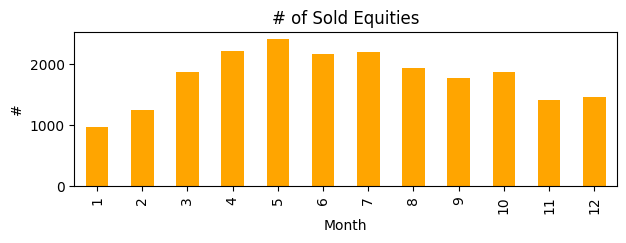

In [238]:
# number of Sold Equities. Also the figure is saved
plt.figure(figsize=(7,2))
df.groupby(['month'])['price'].count().plot(kind = 'bar', color = 'orange')
plt.title('# of Sold Equities')
plt.ylabel('#')
plt.xlabel('Month')
plt.savefig(fname= 'number of Sold Equities', dpi = 300, bbox_inches = 'tight')

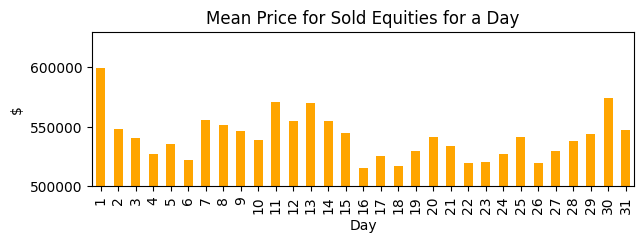

In [239]:
# price per day per sale. Also the figure is saved
plt.figure(figsize=(7,2))
df.groupby(['day'])['price'].mean().plot(kind = 'bar', color = 'orange')
plt.title('Mean Price for Sold Equities for a Day')
plt.ylim(500000)
plt.xlabel('Day')
plt.ylabel('$')
plt.savefig(fname= 'price per day per sale', dpi = 300, bbox_inches = 'tight')

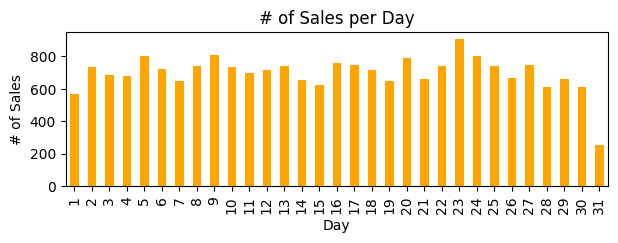

In [240]:
# number of sells per day. Also the figure is saved
plt.figure(figsize=(7,2))
df.groupby(['day'])['id'].count().plot(kind = 'bar', color = 'orange')
plt.title('# of Sales per Day')
plt.ylabel('# of Sales')
plt.xlabel('Day')
plt.savefig(fname= 'number of sells per day', dpi = 300, bbox_inches = 'tight')

# Renovation

Text(0, 0.5, '$')

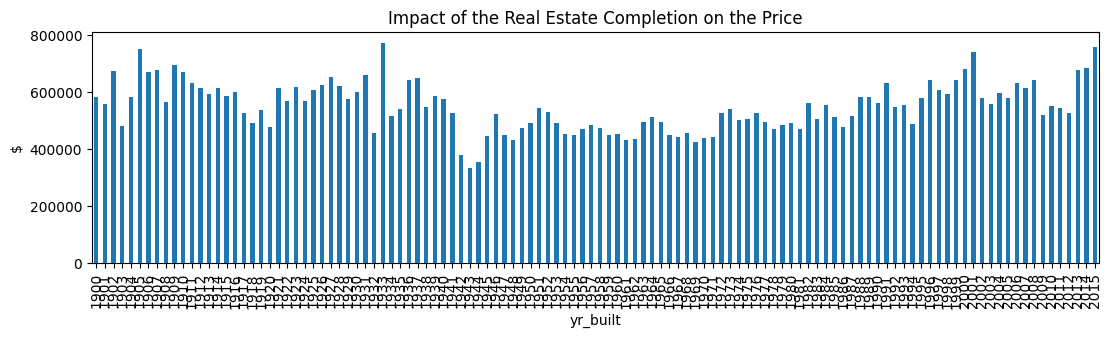

In [241]:
# Impact of the Real Estate Completion on the Price
plt.figure(figsize = (13,3))
df.groupby(['yr_built'])['price'].mean().plot(kind = 'bar')
plt.title('Impact of the Real Estate Completion on the Price')
plt.ylabel('$')

Text(0, 0.5, '$')

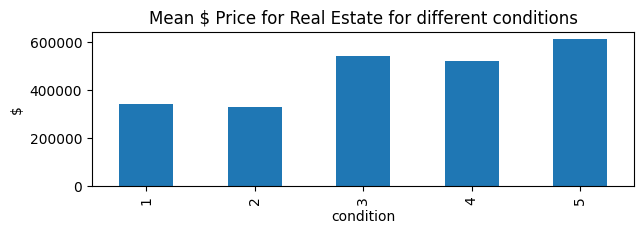

In [242]:
# Mean $ Price for Real Estate for different conditions
plt.figure(figsize=(7,2))
df.groupby(['condition'])['price'].mean().plot(kind = 'bar')
plt.title('Mean $ Price for Real Estate for different conditions')
plt.ylabel('$')

Text(0, 0.5, '#')

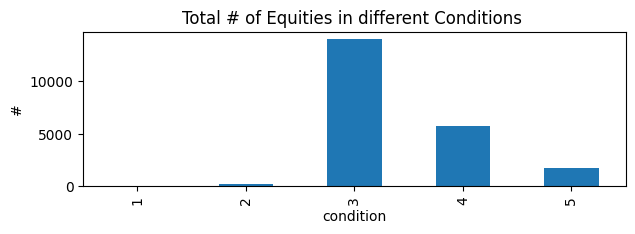

In [243]:
# Total # of Equities in different Conditions 
plt.figure(figsize=(7,2))
df.groupby(['condition'])['price'].count().plot(kind = 'bar')
plt.title('Total # of Equities in different Conditions ')
plt.ylabel('#')

Text(0, 0.5, '#')

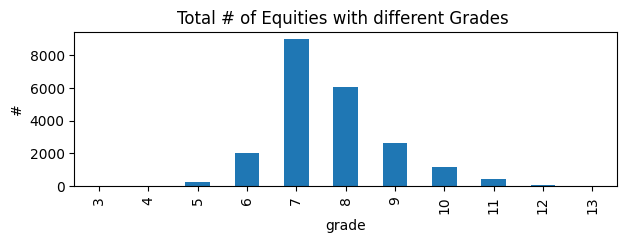

In [244]:
# Total # of Equities with different Grades 
plt.figure(figsize=(7,2))
df.groupby(['grade'])['price'].count().plot(kind = 'bar')
plt.title('Total # of Equities with different Grades')
plt.ylabel('#')

Text(0, 0.5, '$ Mean Price')

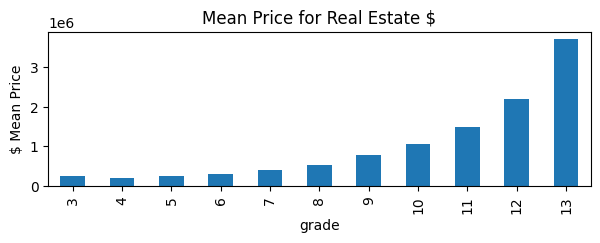

In [245]:
#Mean Price for Real Estate $
plt.figure(figsize=(7,2))
df.groupby(['grade'])['price'].mean().plot(kind = 'bar')
plt.title('Mean Price for Real Estate $')
plt.ylabel('$ Mean Price')

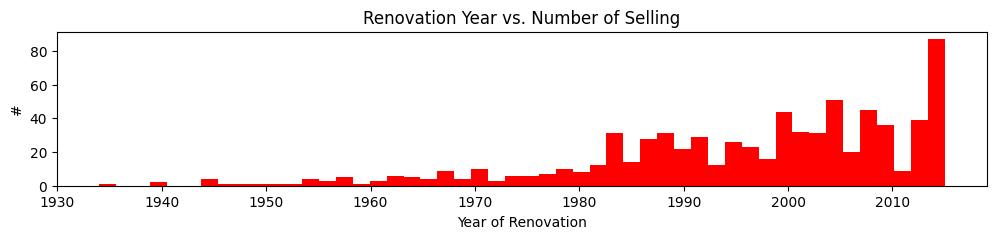

In [347]:
# Renovation Year vs. Number of Selling
plt.figure(figsize=(12,2))
df[df.yr_renovated.notna()].query('yr_renovated > 0')['yr_renovated'].plot(kind = 'hist', color = 'red', bins = 50)
plt.title('Renovation Year vs. Number of Selling')
plt.xlabel('Year of Renovation')
plt.ylabel('#')
plt.savefig(fname= 'Renovated Objects', dpi = 300, bbox_inches = 'tight')

<Figure size 1200x200 with 0 Axes>

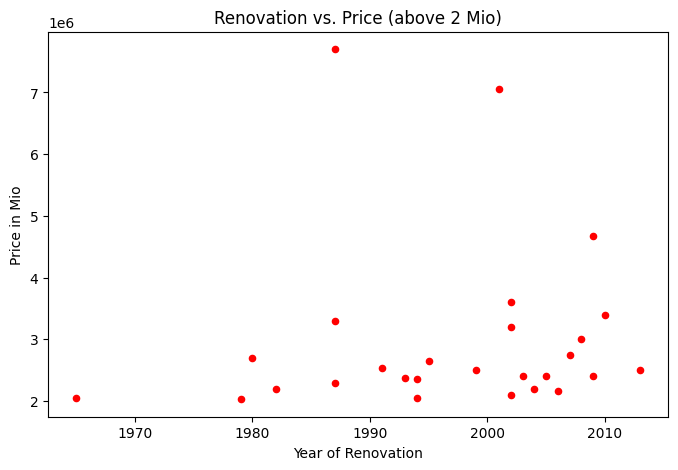

In [247]:
# Renovation vs. Price (above 2 Mio)
plt.figure(figsize=(12,2))
df[df.yr_renovated.notna()].query('yr_renovated > 0 and price > 2e6')[['price','yr_renovated']].plot.scatter(x = 'yr_renovated', y = 'price', color = 'red')
plt.title('Renovation vs. Price (above 2 Mio)')
plt.xlabel('Year of Renovation')
plt.ylabel('Price in Mio')
plt.savefig(fname= 'Renovated Objects above 2 mio', dpi = 300, bbox_inches = 'tight')

<Figure size 1200x200 with 0 Axes>

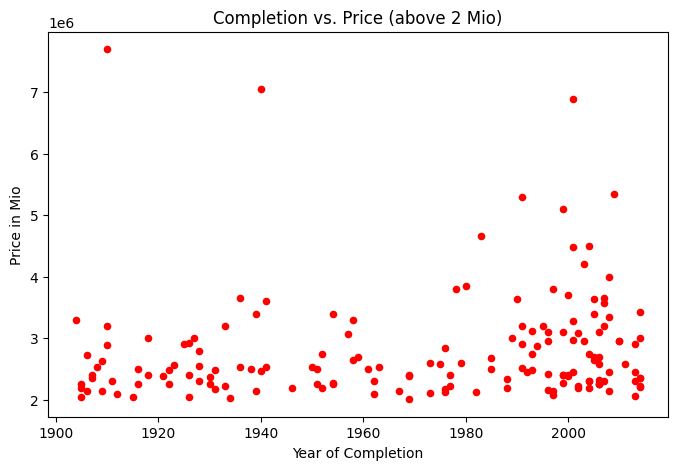

In [266]:
# Completion vs. Price (above 2 Mio)
plt.figure(figsize=(12,2))
df[df.yr_renovated.notna()].query('yr_built > 0 and price >2e6')[['price','yr_built']].plot.scatter(x = 'yr_built', y = 'price', color = 'red')
plt.title('Completion vs. Price (above 2 Mio)')
plt.xlabel('Year of Completion')
plt.ylabel('Price in Mio')
plt.savefig(fname= 'Completed Objects above 2 mio', dpi = 300, bbox_inches = 'tight')

<Figure size 1200x200 with 0 Axes>

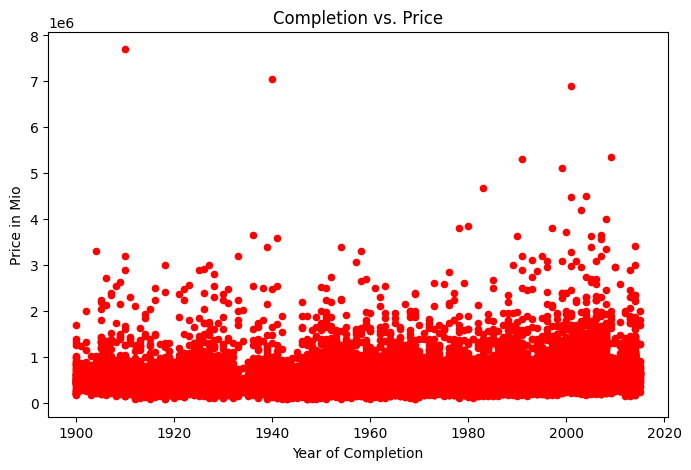

In [285]:
# Completed Objects vs Price
plt.figure(figsize=(12,2))
df[df.yr_renovated.notna()].query('yr_built > 0')[['price','yr_built']].plot.scatter(x = 'yr_built', y = 'price', color = 'red')
plt.title('Completion vs. Price')
plt.xlabel('Year of Completion')
plt.ylabel('Price in Mio')
plt.savefig(fname= 'Completed Objects vs Price', dpi = 300, bbox_inches = 'tight')

<AxesSubplot:xlabel='price', ylabel='yr_renovated'>

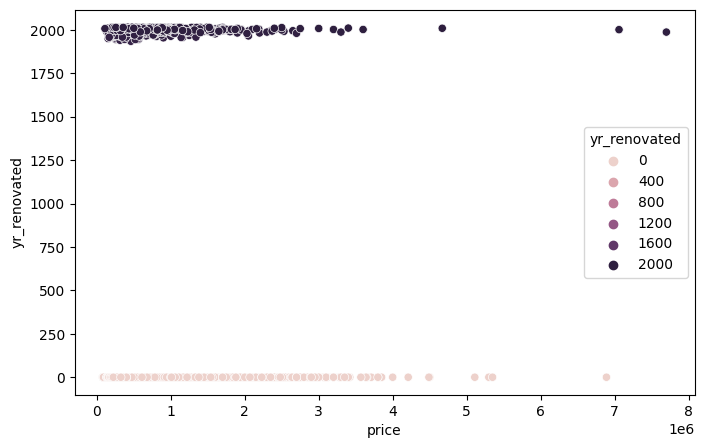

In [248]:
# Checking whether renovation impact the price. It looks like this question can not be answered with this dataset.
# 1) Real Estate with 0 entry is not directly labeled as no renovation
sns.scatterplot(data= df, x = 'price', y = 'yr_renovated', hue='yr_renovated')

In [ ]:
#Checking out whether duplicates are property sales within the given year
dupl_first = df[df.id.duplicated(keep = 'first')]
dupl_last = df[df.id.duplicated(keep = 'last')]
# concat the data frame on same columns
sold_equities = pd.concat([dupl_first, dupl_first], axis = 0)

In [ ]:
# Checking whether duplicates are indeed sales of similar object within the observation year.
# However only some apartments were sold within this time period. Most of the entries are duplicates.
sold_equities.sort_values('id').groupby(['id', 'price']).head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_per_sqft,month,day,year
2495,1000102,4/22/2015,300000.000,6,3.000,2400,9373,2.000,0.000,0.000,...,0.000,98002,47.326,-122.214,2060,7316,125.000,4,22,2015
2495,1000102,4/22/2015,300000.000,6,3.000,2400,9373,2.000,0.000,0.000,...,0.000,98002,47.326,-122.214,2060,7316,125.000,4,22,2015
16801,7200179,4/24/2015,175000.000,2,1.000,840,12750,1.000,0.000,0.000,...,NaN,98055,47.484,-122.211,1480,6969,208.333,4,24,2015
16801,7200179,4/24/2015,175000.000,2,1.000,840,12750,1.000,0.000,0.000,...,NaN,98055,47.484,-122.211,1480,6969,208.333,4,24,2015
11422,109200390,10/20/2014,250000.000,3,1.750,1480,3900,1.000,0.000,0.000,...,0.000,98023,47.298,-122.367,1830,6956,168.919,10,20,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6340,9828200460,1/6/2015,430000.000,2,1.000,700,4800,1.000,0.000,0.000,...,0.000,98122,47.615,-122.300,1440,4800,614.286,1,6,2015
15186,9834200305,2/10/2015,615000.000,3,1.000,1790,3876,1.500,0.000,0.000,...,0.000,98144,47.575,-122.288,1360,4080,343.575,2,10,2015
15186,9834200305,2/10/2015,615000.000,3,1.000,1790,3876,1.500,0.000,0.000,...,0.000,98144,47.575,-122.288,1360,4080,343.575,2,10,2015
1085,9834200885,4/20/2015,550000.000,4,2.500,2080,4080,1.000,0.000,0.000,...,0.000,98144,47.572,-122.290,1340,4080,264.423,4,20,2015


In [ ]:
# Charles Christensen
### Invest with big returns, wondering about renovation?, which Neighborhood? Timing?

## 1.) Does year/month/day impact the sales price of the target? 
            H1: Timing within a year has a minor impact on the Selling Price/overall return. 
                    -> Mean prices of equity within a month/year/day

## 2.) Does the neighborhood impact the price and ultimately the overall return.
            H1: The absolute price of an equity dictates the overall return. The higher the price the higher the return.
                    -> Searching for duplicates in the dataset and focus on expensive houses.
                    
## 3.) Does renovation impact the selling prices? 
            H1: Renovation impacts the reselling price for expensive houses. 
                    -> Search duplicates and check whether renovation took place within the dataset period 